[Página inicio](index.html#indice)

## 1. Comparativa CyL resto CCAA datos INE

Como __primer apartado__ de nuestro análisis vamos a __comparar los datos relativos a la actividad turística de CyL con el resto de CCAA de España__

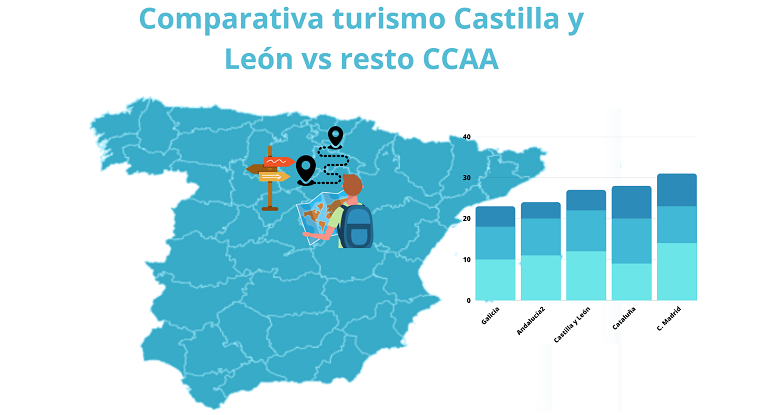

Nos basamos en las principales estadísticas de turismo del INE:
* FRONTUR: [movimiento turístico en fronteras](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=ultiDatos&idp=1254735576863)
* EGATUR: [encuesta de gasto turístico](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177002&menu=ultiDatos&idp=1254735576863)
* FAMILITUR: [encuesta de turismo de residentes](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176990&menu=ultiDatos&idp=1254735576863)

Adicionalmente a estas principales estadísticas y por su importancia para Castilla y León analizamos:
* TURISMO RURAL: [Ocupación de alojamientos de turismo rural](https://www.ine.es/dynt3/inebase/index.htm?padre=234)

Nos centramos en los datos de 2022, aunque hay datos de 2023, trabajamos con 2022 ya es un año cerrado (tenemos la info de todo el año). Cuando trabajamos con serie histórica el limite es 2022 por la misma razón.

In [1]:
# importación librerías
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Turismo intenacional  [FRONTUR: Movimiento turístico en fronteras](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=ultiDatos&idp=1254735576863)

Descargamos y leemos el ficheron del INE que contiene [el Número de turistas según comunidad autónoma de destino principal](https://www.ine.es/jaxiT3/Tabla.htm?t=23988)

Esta es una muestra de los datos del fichero:

In [9]:
# lectura ficheros
df = pd.read_csv("input\\num_turex_CCAA.csv",  
                sep=';', header='infer')
df.sample(20)

,Comunidades autónomas,Tipo de dato,Periodo,Total
113,08 Castilla - La Mancha,Dato base,2021,98.134
68,"04 Balears, Illes",Tasa de variación anual,2017,"6,11"
11,Total,Tasa de variación anual,2018,"1,15"
198,"14 Murcia, Región de",Dato base,2020,279.245
247,"17 Rioja, La",Tasa de variación anual,2020,"-67,49"
276,19 Melilla,Tasa de variación anual,2019,NaN
44,"03 Asturias, Principado de",Dato base,2020,92.222
103,07 Castilla y León,Dato base,2017,1.458.546
196,"14 Murcia, Región de",Dato base,2022,821.232
50,"03 Asturias, Principado de",Tasa de variación anual,2021,"75,08"


Nos quedamos con los datos de base (eliminamos los datos de tasas y variaciones que vienen en el fichero) y los valores de cada CCAA (se eliminan los totales). 

In [10]:
df1 = df[(df['Tipo de dato']=='Dato base') & (df['Comunidades autónomas']!='Total' )]

In [ ]:
# Tratemiento de los separadores de miles y de decimales para convertir el campo en decimal
df1['Total'] = df1['Total'].str.replace('.', '').str.replace(',','.').astype(float)

In [ ]:
# Modificamos el nombre de las comunidades autónomas
df1['Comunidades autónomas'] = df1['Comunidades autónomas'].str[2:]

Realizamos un tratamiento y queda como sigue (muestra):

In [13]:
df1.sample(20)

,Comunidades autónomas,Tipo de dato,Periodo,Total
143,Comunitat Valenciana,Dato base,2019,9535496.0
113,Castilla - La Mancha,Dato base,2021,98134.0
155,Extremadura,Dato base,2021,218790.0
28,Aragón,Dato base,2022,385175.0
213,"Navarra, Comunidad Foral de",Dato base,2019,415054.0
61,"Balears, Illes",Dato base,2017,13792296.0
88,Cantabria,Dato base,2018,381181.0
56,"Balears, Illes",Dato base,2022,13203885.0
243,"Rioja, La",Dato base,2017,124189.0
185,"Madrid, Comunidad de",Dato base,2019,7640980.0


Nos centramos en el año 2022 y analizamos los turistas extranjeros por CCAA

In [14]:
# filtrado
df2 = df1[df1['Periodo']==2022]

In [15]:
# agrupación
df_res = df2[['Comunidades autónomas', 'Total']].groupby(['Comunidades autónomas']).sum().sort_values(by='Total')

In [16]:
# cambio de tipo de datos
df_res['Total'] = df_res['Total'].astype('int')

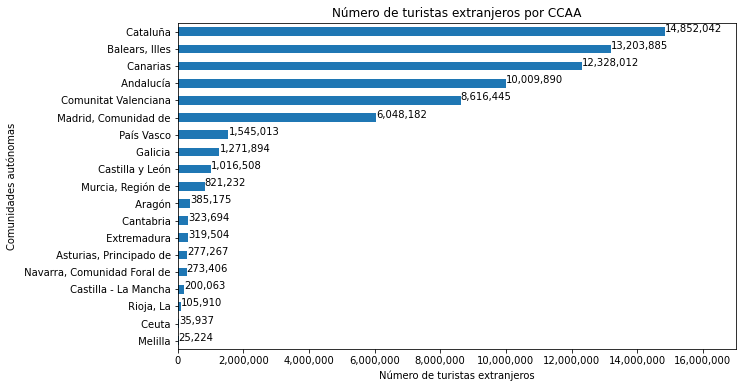

In [53]:
# obtención del gráfico de barras
ax = df_res.plot(kind='barh', figsize=(10,6))
for index, value in enumerate(df_res['Total']):
    formatted_value = '{:,.0f}'.format(value) 
    ax.text(value, index, formatted_value)  # Agrega el valor como etiqueta en la posición correspondiente
ax.set_xlim(0, 17000000) # Eje x
ax.set_title("Número de turistas extranjeros por CCAA")
ax.legend().set_visible(False) # Leyendas
# Agregar títulos a los ejes
ax.set_xlabel("Número de turistas extranjeros")
# Deshabilitar notación científica en el eje x y formatear números en el eje x
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Mostrar el gráfico
plt.show()

Podemos observar que Castilla y León han recibido __1.016.508 turistas extranjeros en 2022__ en base a los datos del INE. La comunidad de Castilla y León se sitúa en el __puesto noveno__ en el gráfico. El total de turistas extranjeros que visitó España en 2022 es 71.659.281, de tal forma que Castilla y León supone un __1,41%__ del total.

Nos preguntamos que ha sucedido en los años anteriores de la serie histórica del INE

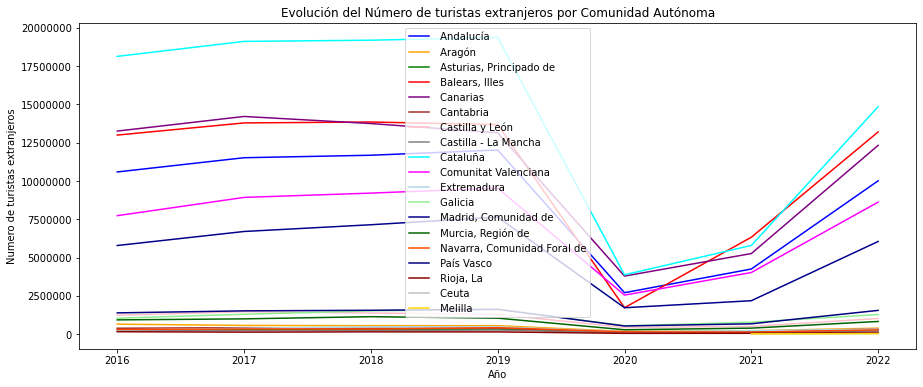

In [18]:
colores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lightblue', 'lightgreen', 'darkblue', 'darkgreen', 'orangered', 'navy', 'darkred', 'silver', 'gold']

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(15, 6))

# Iterar a través de los valores únicos de Comauto y crear una línea para cada uno
for idx, comauto in enumerate(df1['Comunidades autónomas'].unique()):
    subset = df1[df1['Comunidades autónomas'] == comauto]
    ax.plot(subset['Periodo'], subset['Total'], label=comauto, color=colores[idx % len(colores)])

# Agregar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Numero de turistas extranjeros')
ax.set_title('Evolución del Número de turistas extranjeros por Comunidad Autónoma')

# Mostrar leyenda
ax.legend()

# Ajustar el formato de los ejes y eliminar la notación científica
plt.ticklabel_format(style='plain', axis='both')

# Mostrar el gráfico
plt.show()

El gráfico muestra claramente la recuperación postpandemia del turismo

Nos centramos en los datos de Castilla y León

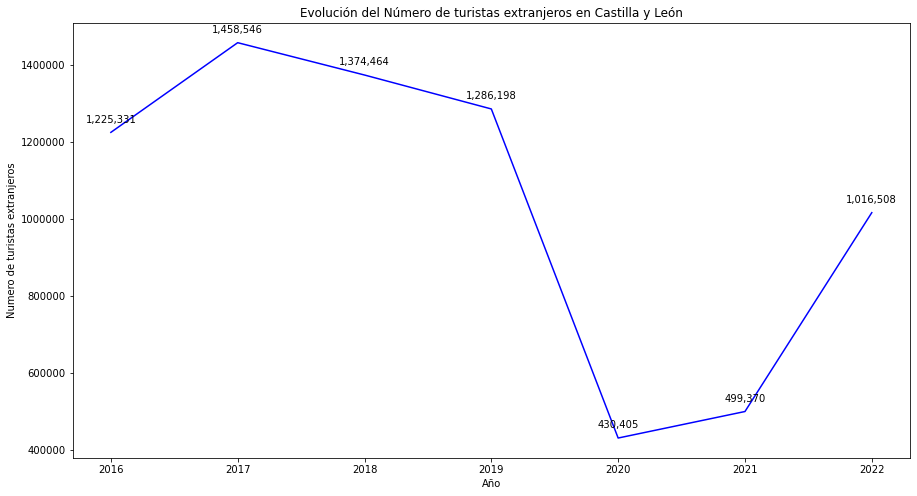

In [20]:
fig, ax = plt.subplots(figsize=(15, 8))
subset = df1[df1['Comunidades autónomas'] == ' Castilla y León']
ax.plot(subset['Periodo'], subset['Total'], label=' Castilla y León', color='blue')
for index, row in subset.iterrows():
    value_formatted = '{:,.0f}'.format(row['Total'])  # Formatear el valor como entero con separador de miles
    ax.annotate(value_formatted, xy=(row['Periodo'], row['Total']), textcoords='offset points', xytext=(0,10), ha='center')

# Agregar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Numero de turistas extranjeros')
ax.set_title('Evolución del Número de turistas extranjeros en Castilla y León')


# Ajustar el formato de los ejes y eliminar la notación científica
plt.ticklabel_format(style='plain', axis='both')

# Mostrar el gráfico
plt.show()

Castilla y León sigue una evolución muy similar al del resto de CCAA, __el turismo extranjero sigue recuperándose, aunque estamos lejos (-30%) del record de visitantes extranjeros de 2017__ que fue 1.458.546.

A continuación realizamos un análisis por nacionalidades. Nos basamos en los [datos del INE](https://www.ine.es/jaxiT3/Tabla.htm?t=13884) que  son descargados y tratados para ser agregados por nacionalidad y año (2022)

Esta es una muestra de los datos del fichero:

In [21]:
# lectura fichero
df_nac = pd.read_excel("input\\turex_por_nacionalidad_2022.xls")
df_nac.head(10)

,procedencia,turistas
0,Alemania,9768598
1,Bélgica,2513389
2,Francia,10096040
3,Irlanda,2089462
4,Italia,4011139
5,Paíse Bajos,3923090
6,Países Nórdicos,4291225
7,Portugal,2415936
8,Reino Unido,15121911
9,Suiza,1654733


In [22]:
# ordenación
df_nac.sort_values(by='turistas', inplace=True)
df_nac.set_index('procedencia', inplace=True)

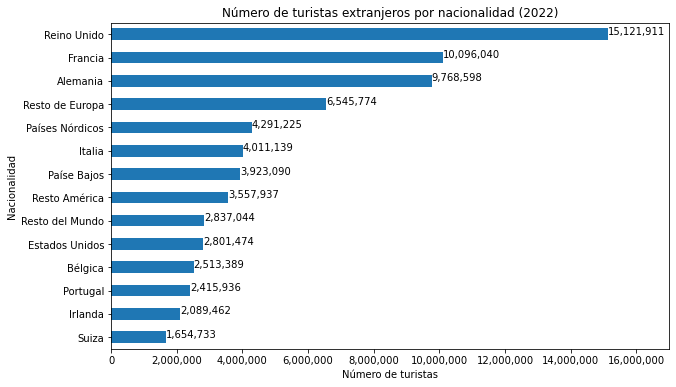

In [54]:
# grafico de barras
ax = df_nac.plot(kind='barh', figsize=(10,6))
for index, value in enumerate(df_nac['turistas']):
    formatted_value = '{:,.0f}'.format(value) 
    ax.text(value, index, formatted_value)  # Agrega el valor como etiqueta en la posición correspondiente
ax.set_xlim(0, 17000000) # Eje x
ax.set_title("Número de turistas extranjeros por nacionalidad (2022)")
ax.legend().set_visible(False) # Leyendas
# Agregar títulos a los ejes
ax.set_ylabel("Nacionalidad")
ax.set_xlabel("Número de turistas")
# Deshabilitar notación científica en el eje x y formatear números en el eje x
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Mostrar el gráfico
plt.show()

Observamos que las __tres nacionalidades que más visitan España en 2022 son: Reino Unido, Francia y Alemania__, situándose en un destacado primer lugar Reino Unido con más de 15 millones de visitantes que supone más del 20% del total.

A continuación analizamos datos correspondientes a Castilla y León para ello se realiza un filtrado previo en la consulta de los [datos del INE](https://www.ine.es/jaxiT3/Tabla.htm?t=13884) por la CCAA de Castilla y León en 2022

Esta es una muestra de los datos del fichero:

In [56]:
#lectura fichero
df_nac_cyl = pd.read_csv("input\\turex_cyl_nac_2022.txt", sep=';', header='infer')
df_nac_cyl.head(15)

,procedencia,turistas
0,Francia,437316
1,Portugal,175074
2,Reino Unido,65658
3,Alemania,55359
4,Italia,45781
5,Países Bajos,38854
6,Bélgica,38822
7,Estados Unidos,22476
8,Irlanda,6185
9,Resto de Europa,85122


In [58]:
# ordenación
df_nac_cyl.sort_values(by='turistas', inplace=True)
df_nac_cyl.set_index('procedencia', inplace=True)

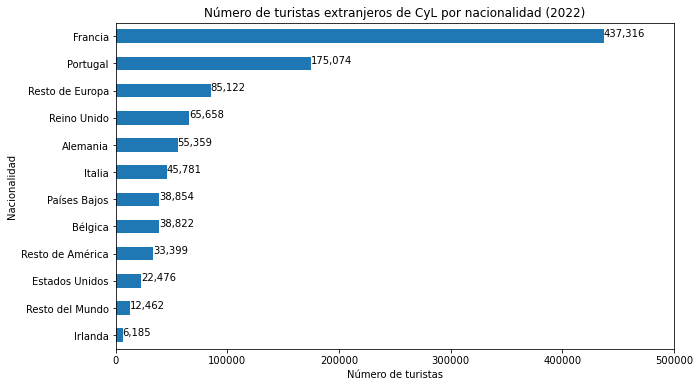

In [59]:
# gráfico de barras
ax = df_nac_cyl.plot(kind='barh', figsize=(10,6))
for index, value in enumerate(df_nac_cyl['turistas']):
    formatted_value = '{:,.0f}'.format(value) 
    ax.text(value, index, formatted_value)  # Agrega el valor como etiqueta en la posición correspondiente
ax.set_xlim(0, 500000) # Eje x
ax.set_title("Número de turistas extranjeros de CyL por nacionalidad (2022)")
ax.set_ylabel("Nacionalidad")
ax.set_xlabel("Número de turistas")
ax.legend().set_visible(False) # Leyendas
# Mostrar el gráfico
plt.show()

Vemos que en 2022 las nacionalidades que visitan Castilla y León son distantas a las que visitan España. 
* __En primer lugar Francia__ muy destacada con 437316 turistas (más del 40% del total),
* __En segundo lugar Portugal__, e nivel nacional Portugal está muy lejos de los primeros puestos
* Encontramos a Reino Unido y Alemania con números bajos respecto a las dos anteriores, cuando estas dos nacionalidades son líderes a nivel nacional

Para analizar los datos obtenidos y tratar de sacar conclusiones y posibles acciones de marketing vamos a apoyarnos en un modelo de  __Inteligencia Artificial Generativa__.
Para ello vamos a emplear un [LLM (Gran Modelo de Lenguaje)](https://es.wikipedia.org/wiki/LLM_(modelo_grande_de_lenguaje)), concretamente el desarrollado por [ChatGPT 3.5](https://chat.openai.com).
Para llamarlo desde Python empleamos la librería [OpenAI](https://platform.openai.com/docs/api-reference?lang=python), que requiere la creación de un usuario para llamadas a través del API.

In [27]:
# importar libreria
import openai
# Establecer la clave de la API de OpenAI
openai.api_key = ''

In [28]:
# función para llamar a ChatGPT
def preguntar_a_chatgpt(pregunta):
    response = openai.Completion.create(
        engine='text-davinci-003',  # Selecciona el motor de ChatGPT
        prompt=pregunta,
        max_tokens=50,  # Define el límite de tokens para la respuesta
        n=1,  # Solicita una única respuesta
        stop=None,  # Define las condiciones de parada, si es necesario
        temperature=0.7,  # Ajusta la temperatura para el nivel de creatividad en las respuestas
    )
    return response.choices[0].text.strip()

Generamos las preguntas a realizar a ChatGPT.
* pregunta1: "¿Qué tipo de turismo encontramos en Castilla y León?"

In [29]:
pregunta1 = "¿Qué tipo de turismo encontramos en Castilla y León(España)?"

In [ ]:
res_chatgpt1 = preguntar_a_chatgpt(pregunta1)

In [107]:
print(res_chatgpt1)


Castilla y León, una comunidad autónoma en España, es conocida por ofrecer una variedad de tipos de turismo debido a su rica historia, paisajes naturales y patrimonio cultural. Algunos de los tipos de turismo que puedes encontrar en Castilla y León son:

Turismo Cultural: La región cuenta con numerosos sitios históricos y culturales, como ciudades medievales, castillos, catedrales góticas y monasterios. Destinos como Ávila, Salamanca, Segovia y León albergan impresionantes monumentos que muestran la historia de España.

Turismo Rural: Castilla y León ofrece un entorno rural y natural con hermosos paisajes, pueblos encantadores y actividades al aire libre. El turismo rural permite a los visitantes disfrutar de la tranquilidad, la naturaleza y la autenticidad de la vida rural.

Turismo Gastronómico: La región es famosa por su rica gastronomía, que incluye platos tradicionales como el lechazo asado, el cochinillo, la morcilla de Burgos y los quesos. Los viajeros pueden disfrutar de la co

Vamos a tratar de __analizar las causas en las diferencias en las nacionalidades__ que visitan Castilla y León respecto a las nacionalidades que visitan el conjunto de España empleando el modelo LLaMA2.

Preguntas a realizar a ChatGPT.
__pregunta2__: Revisando los turistas extranjeros que ha recibido Castilla y León en 2022 vemos que las nacionalidades 
    más frecuentes son la francesa y la portuguesa por este orden. Sin embargo cuando analizamos los 
    turistas que visitan el total de España, las nacionalidades más frecuentes son Reino Unido, Alemania y Francia por este orden.Queremos analizar las causas de las diferencias en las nacionalidades que visitan Castilla y León frente al total 
        de España. ¿Puedes ser por el tipo de turismo?, ¿puede deberse la diferencia a los destinos con turismo de sol y playa?, ¿cercanía o vías de comunicación con Francia y Portugal de Castilla y León?

In [109]:
pregunta2= """Revisando los turistas extranjeros que ha recibido Castilla y León en 2022 vemos que las nacionalidades 
    más frecuentes son la francesa y la portuguesa por este orden. Sin embargo cuando analizamos los 
    turistas que visitan el total de España, las nacionalidades más frecuentes son Reino Unido, Alemania y Francia por este orden.
    Queremos analizar las causas de las diferencias en las nacionalidades que visitan Castilla y León frente al total 
        de España. ¿Puedes ser por el tipo de turismo?, ¿puede deberse la diferencia a los destinos con turismo de sol y playa?, 
        ¿cercanía o vías de comunicación con Francia y Portugal de Castilla y León?
        """

In [ ]:
res_chatgpt2 = preguntar_a_chatgpt(pregunta2)

In [111]:
print(res_chatgpt2)


Las diferencias en las nacionalidades de los turistas que visitan Castilla y León en comparación con el total de España pueden estar influenciadas por una combinación de varios factores. Los factores que mencionaste, como el tipo de turismo, los destinos de sol y playa, la cercanía geográfica y las vías de comunicación, pueden jugar un papel importante en estas diferencias:

Tipo de Turismo: El tipo de turismo que ofrece Castilla y León puede ser un factor importante. Si la región se destaca por su turismo cultural, rural, enológico o histórico, podría atraer a turistas de nacionalidades que buscan esas experiencias específicas. Por otro lado, las regiones costeras con turismo de sol y playa pueden atraer a diferentes tipos de turistas.

Destinos de Sol y Playa: Las regiones de España con destinos de sol y playa, como las Islas Baleares, las Islas Canarias y la costa mediterránea, tienden a atraer a turistas de países europeos, como Reino Unido y Alemania, que buscan vacaciones de pla

Preguntas a realizar a ChatGPT. __pregunta3__: ¿Me puedes recomendar fuentes de datos que me ayuden a profundizar en el análisis antes señalado sobre la diferencia de nacionalidades de los turistas de Castilla y León frente al conjunto de España?

In [ ]:
pregunta3= """
    ¿Me puedes recomendar fuentes de datos que me ayuden a profundizar en el análisis antes señalado
    sobre la diferencia de nacionalidades de los turistas de Castilla y León frente al conjunto de España?
        """

In [ ]:
res_chatgpt3 = preguntar_a_chatgpt(pregunta3)

In [113]:
print(res_chatgpt3)


Por supuesto, aquí tienes algunas fuentes de datos y recursos que podrían ayudarte a profundizar en el análisis de las diferencias en las nacionalidades de los turistas que visitan Castilla y León en comparación con el conjunto de España:

Instituto Nacional de Estadística (INE) - Turismo Internacional: El INE proporciona datos detallados sobre el turismo internacional en España. Puedes encontrar información sobre el número de turistas extranjeros por nacionalidad, destinos visitados, duración de la estancia, entre otros datos relevantes.

Sitio web: Instituto Nacional de Estadística (INE)

Ministerio de Industria, Comercio y Turismo - Estadísticas Turísticas: El Ministerio de Industria, Comercio y Turismo de España también ofrece estadísticas turísticas que incluyen datos sobre las llegadas de turistas extranjeros por comunidad autónoma, nacionalidades y otros aspectos relacionados con el turismo.

Sitio web: Ministerio de Industria, Comercio y Turismo

Observatorio del Turismo de Ca

Comprobamos que __ChatGPT nos puede ayudar a analizar__ esta cuestión y nos recomienda recursos. Sobre cada una de las pistas que nos ofrece se puede profundizar. Por ejemplo, el tema de las buenas vías de acceso puede afectar a que algunos de los turistas que vayan de Francia a Portugal paren en Castilla y León, por ejemplo en Salamanca. Dejamos aquí este análisis, pero queremos resaltar que __ChatGPT__ puede ser un __buen asistente__ para analizar los datos. Para terminar le solicitamos ideas para una campaña de marketing basada en los análisis realizados.

Preguntas a realizar a ChatGPT. __pregunta4__: Conociendo el tipo de turismo que ofrece Castilla y León y que las nacionalidades que más visitan esta comunidad son la francesa y la portuguesa, me gustaría que me recomendaras unas ideas
para una campaña de marketing personalizada para estos países sobre Castilla y León para atraer más turistas.

In [ ]:
pregunta4= """
    Conociendo el tipo de turismo que ofrece Castilla y León y que las nacionalidades que más visitan esta comunidad son la francesa y la portuguesa, me gustaría que me recomendaras unas ideas
para una campaña de marketing personalizada para estos países sobre Castilla y León para atraer más turistas.
        """

In [ ]:
res_chatgpt4 = preguntar_a_chatgpt(pregunta4)

In [123]:
print(res_chatgpt4)


Por supuesto, aquí tienes algunas ideas más personalizadas y específicas para una campaña de marketing dirigida a franceses y portugueses, con el objetivo de promover Castilla y León como destino turístico:

Para Turistas Franceses:

Explora la Riqueza del Patrimonio Medieval: "Vive la magia de la Edad Media en Castilla y León. Recorre ciudades históricas, castillos y catedrales que te transportarán a épocas pasadas."

Descubre el Encanto de los Pueblos Rurales: "Escápate a nuestros pintorescos pueblos rurales, donde el ritmo tranquilo de vida y la autenticidad te permitirán desconectar de la rutina."

Un Viaje de Vino y Gastronomía: "Sumérgete en los sabores de Castilla y León. Disfruta de catas de vino en bodegas centenarias y saborea platos tradicionales en acogedores restaurantes."

Revive la Ruta del Camino de Santiago: "Sigue los pasos de los peregrinos a lo largo del Camino de Santiago. Experimenta una travesía espiritual y cultural que te cambiará para siempre."

Descubre Fest

### 1.2  Gasto turístico EGATUR: [encuesta de gasto turístico](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177002&menu=ultiDatos&idp=1254735576863)

Descargamos el fichero del INE que tiene el [gasto turístico por nacionalidad](https://www.ine.es/jaxiT3/Tabla.htm?t=10838). Obtenemos los datos de 2022.

Esta es una muestra de los datos del fichero, el gasto está en millones de euros:

In [61]:
# lectura fichero
dfg = pd.read_excel("input\\gastos_por_nacionalidad_2022.xls")
dfg.head(10)

,procedencia,gasto
0,Reino Unido,17155.02
1,Países Nórdicos,5937.21
2,Resto del Mundo,40815.80
3,Alemania,11526.44
4,Francia,8161.30
5,Italia,3542.39


In [62]:
# ordenación
dfg.sort_values(by='gasto', inplace=True)
dfg.set_index('procedencia', inplace=True)

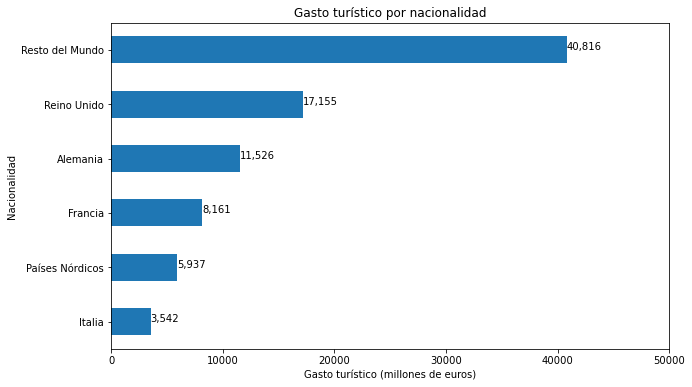

In [63]:
# grafico de barras
ax = dfg.plot(kind='barh', figsize=(10,6))
for index, value in enumerate(dfg['gasto']):
    formatted_value = '{:,.0f}'.format(value) 
    ax.text(value, index, formatted_value)  # Agrega el valor como etiqueta en la posición correspondiente
ax.set_xlim(0, 50000) # Eje x
ax.legend().set_visible(False) # Leyendas
ax.set_ylabel("Nacionalidad")
ax.set_xlabel("Gasto turístico (millones de euros)")
ax.set_title("Gasto turístico por nacionalidad")
# Mostrar el gráfico
plt.show()

El gasto turístico refleja una situación parecida a la vista anteriormente en el número de visitantes extranjeros. __Las nacionalidades que más gastan a nivel nacional son: Reino Unido, Alemania y Francia__

Nos interesa analizar [el Gasto de los turistas internacionales según comunidad autónoma de destino principal](https://www.ine.es/jaxiT3/Tabla.htm?t=10839&L=0), pero vemos que el INE en el desglose por CCAA sólo considera 6 CCAA y no muestra Castilla y León, estos datos están agrupados en una clasificación llamada 'Otras Comunidades Autónomas', de forma que no podemos ver ese desglose.

### 1.3   Turismo españoles FAMILITUR: [encuesta de turismo de residentes](https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176990&menu=ultiDatos&idp=1254735576863)

Sobre el turismo de residentes nacionales que ofrece FAMILITUR descargamos el fichero que nos ofrece [las pernoctaciones y el gasto total realizado por los residentes a nivel de cada destino principal (CCAA)](https://www.ine.es/jaxiT3/Tabla.htm?t=24927) relativo a 2022.

Esta es una muestra de los datos del fichero:

In [64]:
# lectura fichero
dfr = pd.read_excel("input\\gastos_percnoctaciones_residentes_2022.xls")
dfr.head(10)

,CCAA,Pernoctaciones,Gasto_total_miles
0,01 Andalucía,117867540,6963409.04
1,02 Aragón,25469094,1415024.84
2,"03 Asturias, Principado de",18041814,1098933.01
3,"04 Balears, Illes",16028800,1267878.11
4,05 Canarias,24538620,2142781.23
5,06 Cantabria,14712052,783983.30
6,07 Castilla y León,58741918,2553355.89
7,08 Castilla - La Mancha,31321693,1409501.34
8,09 Cataluña,82260260,5063479.45
9,10 Comunitat Valenciana,84030696,4193264.76


In [65]:
dfr.loc[:,'CCAA'] = dfr['CCAA'].str[2:]

Mostramos el gasto y las pernoctaciones de los residentes por CCAA de destino

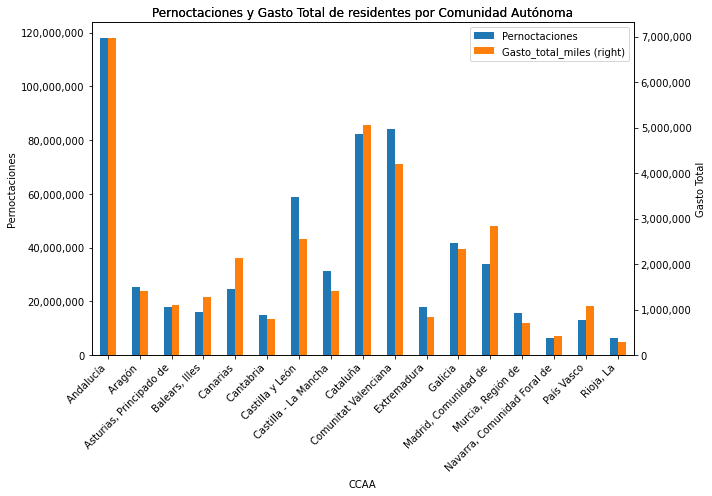

In [74]:
# Generar el gráfico de barras con dos ejes y una escala secundaria
ax = dfr.plot(x='CCAA', y=['Pernoctaciones', 'Gasto_total_miles'], figsize=(10, 7), kind='bar', secondary_y='Gasto_total_miles')

# Personalizar las etiquetas del eje x en oblicuo
ax.set_xticklabels(dfr['CCAA'], rotation=45, ha='right')

# Deshabilitar notación científica en los ejes y y formatear números
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.right_ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Añadir títulos y leyendas
ax.set_title('Pernoctaciones y Gasto Total de residentes por Comunidad Autónoma')
ax.set_ylabel('Pernoctaciones')
ax.right_ax.set_ylabel('Gasto Total')

# Añadir títulos y leyendas
plt.title('Pernoctaciones y Gasto Total de residentes por Comunidad Autónoma')
plt.tight_layout()
plt.show()

Las CCAA que más __pernoctaciones de residentes__ reciben son:  Andalucía, Comunidad Valenciana y Cataluña. Castilla y León se sitúa en el __cuarto puesto__ con 58.741.918 pernoctaciones en 2022

In [37]:
# ordenación
dfr.sort_values(by='Pernoctaciones', ascending=False)

,CCAA,Pernoctaciones,Gasto_total_miles
0,Andalucía,117867540,6963409.04
9,Comunitat Valenciana,84030696,4193264.76
8,Cataluña,82260260,5063479.45
6,Castilla y León,58741918,2553355.89
11,Galicia,41530906,2337966.93
12,"Madrid, Comunidad de",33905470,2839761.23
7,Castilla - La Mancha,31321693,1409501.34
1,Aragón,25469094,1415024.84
4,Canarias,24538620,2142781.23
2,"Asturias, Principado de",18041814,1098933.01


En lo relativo al __gasto de los residentes__. Las CCAA que más __gasto__ de residentes reciben son:  Andalucía, Comunidad Valenciana y Cataluña. Castilla y León se sitúa en el __quinto puesto__ con 2.553.355.890 euros en 2022

In [38]:
# ordenación
dfr.sort_values(by='Gasto_total_miles', ascending=False)

,CCAA,Pernoctaciones,Gasto_total_miles
0,Andalucía,117867540,6963409.04
8,Cataluña,82260260,5063479.45
9,Comunitat Valenciana,84030696,4193264.76
12,"Madrid, Comunidad de",33905470,2839761.23
6,Castilla y León,58741918,2553355.89
11,Galicia,41530906,2337966.93
4,Canarias,24538620,2142781.23
1,Aragón,25469094,1415024.84
7,Castilla - La Mancha,31321693,1409501.34
3,"Balears, Illes",16028800,1267878.11


Si comparamos estos resultados con los datos de turistas extranjeros, vemos que __la posición de Castilla y León respecto al resto de CCAA es notablemente mejor para el turismo nacional que para el de extranjeros__, posiblemente debido al tipo de oferta turística ofrecida por Castilla y León (turismo tural, cultural, religioso, gastronómico, etc..), el peso del turismo de sol y playa en los turistas extranjeros puede influir también.

### 4. En cuarto lugar analizamos el TURISMO RURAL: [Ocupación de alojamientos de turismo rural](https://www.ine.es/dynt3/inebase/index.htm?padre=234)

Relativo al turismo rural descargamos los [Viajeros por comunidades y ciudades autónomas](https://www.ine.es/jaxiT3/Tabla.htm?t=1995&L=0). Los datos son de 2022 y se diferencia entre turistas residentes y extranjeros.

Esta es una muestra de los datos del fichero:

In [75]:
# lectura fichero
dftr = pd.read_excel("input\\turismo_rural_viajeros_residentes_extranjeros_2022.xls")
dftr.head(10)

,CCAA,residentes,extranjeros
0,01 Andalucía,280164,113013
1,02 Aragón,204287,21822
2,"03 Asturias, Principado de",243449,23387
3,"04 Balears, Illes",76999,311489
4,05 Canarias,41525,46234
5,06 Cantabria,262999,35521
6,07 Castilla y León,693197,57296
7,08 Castilla - La Mancha,328279,10372
8,09 Cataluña,421266,67422
9,10 Comunitat Valenciana,119378,13685


In [40]:
# tratamiento de strings
dftr.loc[:,'CCAA'] = dfr['CCAA'].str[1:]

__En lo relativo a turismo rural de residentes Castilla y León es lider__ con 693.197 viajeros en 2022, seguido por Cataluña y Castilla - La Mancha.

In [41]:
# ordenación
dftr.sort_values(by='residentes', ascending=False)

,CCAA,residentes,extranjeros
6,Castilla y León,693197,57296
8,Cataluña,421266,67422
7,Castilla - La Mancha,328279,10372
0,Andalucía,280164,113013
5,Cantabria,262999,35521
2,"Asturias, Principado de",243449,23387
10,Extremadura,215576,22672
1,Aragón,204287,21822
11,Galicia,148199,62463
12,"Madrid, Comunidad de",137873,9065


En lo relativo a __turismo rural de extranjeros__ Castilla y León ocupa la __quinta posición__ con 57.296 viajeros en 2022, la CCAA que más extranjeros recibe con diferencia es Baleares seguida por Andalucía y Cataluña.

In [42]:
# ordenación
dftr.sort_values(by='extranjeros', ascending=False)

,CCAA,residentes,extranjeros
3,"Balears, Illes",76999,311489
0,Andalucía,280164,113013
8,Cataluña,421266,67422
11,Galicia,148199,62463
6,Castilla y León,693197,57296
4,Canarias,41525,46234
15,País Vasco,135084,37339
5,Cantabria,262999,35521
2,"Asturias, Principado de",243449,23387
10,Extremadura,215576,22672


Los datos relativos al turismo rural se los vamos a enviar a ChatGPT para que nos haga un análisis de los mismos.

Preguntas a realizar a ChatGPT. __pregunta5__: Adjuntamos los datos de turismo rural de España en 2022, me gustaría que hagas un análisis de los mismos y qué conclusiones podemos obtener.
DATOS:                            CCAA  residentes  extranjeros
0                     Andalucía      280164       113013
1                        Aragón      204287        21822
2       Asturias, Principado de      243449        23387
3                Balears, Illes       76999       311489
4                      Canarias       41525        46234
5                     Cantabria      262999        35521
6               Castilla y León      693197        57296
7          Castilla - La Mancha      328279        10372
8                      Cataluña      421266        67422
9          Comunitat Valenciana      119378        13685
10                  Extremadura      215576        22672
11                      Galicia      148199        62463
12         Madrid, Comunidad de      137873         9065
13            Murcia, Región de       33735         3230
14  Navarra, Comunidad Foral de      132638        14359
15                   País Vasco      135084        37339
16                    Rioja, La       25700         4996
El campo CCAA contiene la Comunidad Autónoma que recibe los turistas, el campo residentes el numero de turistas españoles y el campo extranjeros el número de turistas extranjeros 

In [157]:
pregunta5 = """
Adjuntamos los datos de turismo rural de España en 2022, me gustaría que hagas un análisis de los mismos y qué conclusiones podemos obtener.
""" + "DATOS: " + dftr.to_string() + "\n" + "El campo CCAA contiene la Comunidad Autónoma que recibe los turistas, el campo residentes el numero de turistas españoles y el campo extranjeros el número de turistas extranjeros "

In [158]:
print(pregunta5)


Adjuntamos los datos de turismo rural de España en 2022, me gustaría que hagas un análisis de los mismos y qué conclusiones podemos obtener.
DATOS:                            CCAA  residentes  extranjeros
0                     Andalucía      280164       113013
1                        Aragón      204287        21822
2       Asturias, Principado de      243449        23387
3                Balears, Illes       76999       311489
4                      Canarias       41525        46234
5                     Cantabria      262999        35521
6               Castilla y León      693197        57296
7          Castilla - La Mancha      328279        10372
8                      Cataluña      421266        67422
9          Comunitat Valenciana      119378        13685
10                  Extremadura      215576        22672
11                      Galicia      148199        62463
12         Madrid, Comunidad de      137873         9065
13            Murcia, Región de       33735         3

In [ ]:
res_chatgpt5 = preguntar_a_chatgpt(pregunta5)

In [160]:
print(res_chatgpt5)


A continuación, analizo los datos de turismo rural en España en 2022 y extraigo algunas conclusiones basadas en la información proporcionada:

Mayor Presencia de Turistas Residentes: En términos generales, se observa una mayor presencia de turistas residentes (españoles) en comparación con los turistas extranjeros en la mayoría de las comunidades autónomas. Esto sugiere que el turismo rural es una opción popular entre los propios residentes de España.

Andalucía, Castilla y León y Cataluña a la Cabeza: Las comunidades autónomas de Andalucía, Castilla y León y Cataluña son las que recibieron la mayor cantidad de turistas rurales en general (suma de turistas residentes y extranjeros). Estas regiones parecen ser destinos rurales atractivos tanto para los españoles como para los extranjeros.

Mayor Contribución de Turistas Extranjeros: En algunas comunidades autónomas, como Balears (Islas Baleares), Canarias y Cataluña, los turistas extranjeros constituyen una proporción significativa del

__Volvemos a comprobar que ChatGPT puede ser un buen asistente en la tarea de analizar datos__ y apunta varias conclusiones interesantes.

### Conclusiones comparativa Castilla y León con resto CCAA y uso ChatGPT

Como resumen sobre los datos de 2022 analizados podemos indicar:
* Castilla y León ocupa el noveno puesto en cuanto a turistas extranjeros.
* La recuperación postpandemia de Castilla y León respecto a turismo extranjero es similar al resto de Comunidades.
* Mientras que a nivel nacional las nacionalidades que más nos visitan son Reino Unido, Alemania y Francia, a nivel de Castilla y León las nacionalidades más frecuentes son la francesa y portuguesa.
* En lo relativo a turismo nacional ocupa un cuarto puesto en lo relativo a pernoctaciones y un quinto puesto en gasto.
* CyL es líder en turismo rural. En lo relativo a turistas españoles ocupa el primer lugar y en lo relativo a extranjeros un quinto lugar
* ChatGPT puede ser un asistente valioso para analizar datos y proponer ideas para seguir investigando.

[Página inicio](index.html#indice)